In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


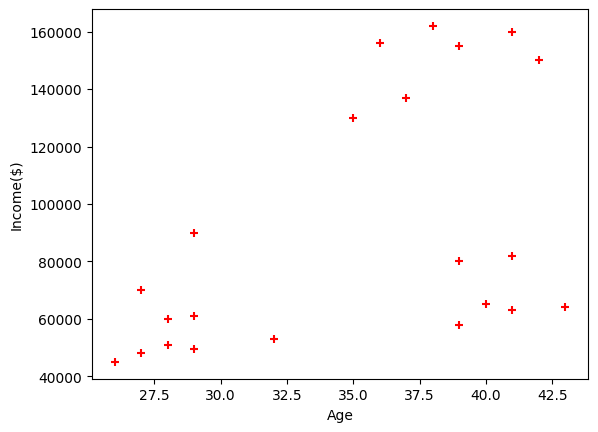

In [3]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age, df['Income($)'], color='red', marker='+')

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted

In [7]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

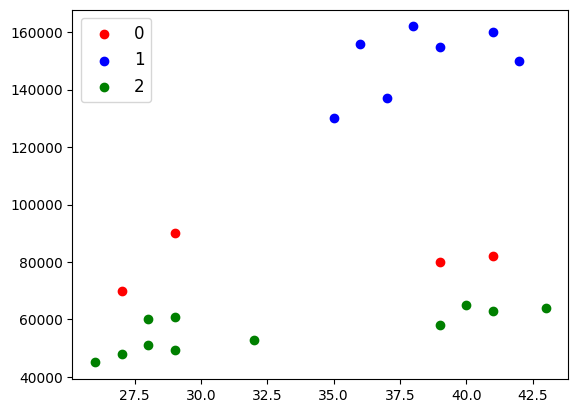

In [11]:
plt.scatter(df0['Age'],df0['Income($)'], color='red' ,label='0')
plt.scatter(df1['Age'],df1['Income($)'], color='blue', label='1')
plt.scatter(df2['Age'],df2['Income($)'], color='green', label='2')
plt.legend(loc="upper left", fontsize=12)

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [18]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [19]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

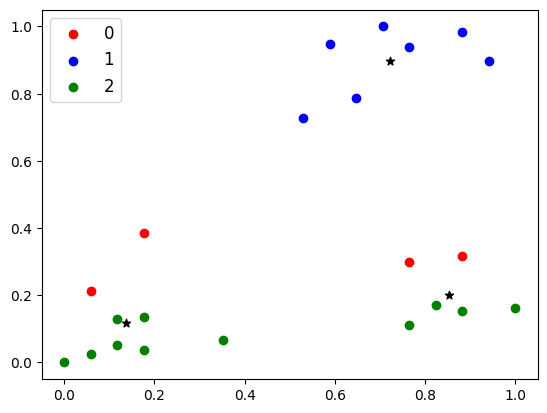

In [20]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
 
plt.scatter(df0['Age'],df0['Income($)'], color='red' ,label='0')
plt.scatter(df1['Age'],df1['Income($)'], color='blue', label='1')
plt.scatter(df2['Age'],df2['Income($)'], color='green', label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*')

plt.legend(loc="upper left", fontsize=12)

In [22]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

In [23]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.4028477025733999,
 0.3505493863531699,
 0.23472396003560048,
 0.18269415744795037,
 0.1797922473596401,
 0.10995816883086569]

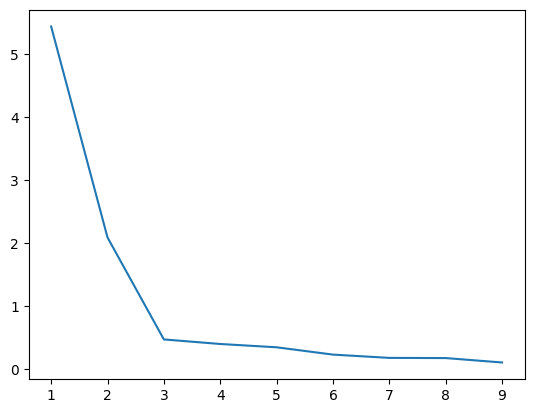

In [24]:
plt.plot(k_rng,sse)